In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Renaming the columns first because there are some inconsistency between column names

In [2]:
df = pd.read_csv('/content/bangladesh_population.csv')
df.columns =  ['date(year)','population','annual_pct_change','district', 'area(km²)', 'census_1991', 'census_2001', 'census_2011',
       'census_2022']
print(df.head())
df.info()

   date(year)  population  annual_pct_change    district area(km²)  \
0        1950    39728535                NaN     Barguna     1,831   
1        1951    40548590               2.06     Barisal     2,785   
2        1952    41426885               2.17       Bhola     3,403   
3        1953    42329279               2.18   Jhalakati       707   
4        1954    43282032               2.25  Patuakhali     3,221   

  census_1991 census_2001 census_2011 census_2022  
0     775,693     848,554     892,781   1,010,530  
1   2,207,426   2,355,967   2,324,310   2,570,450  
2   1,476,328   1,703,117   1,776,795   1,932,514  
3     666,139     694,231     682,669     661,161  
4   1,273,872   1,460,781   1,535,854   1,727,254  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date(year)         73 non-null     int64  
 1   population      

## Making a dataframe containing individual district population from the original dataset

In [3]:
district_df = df.drop(columns=['date(year)','population','annual_pct_change'])
district_df.isna().sum()

,0
district,9
area(km²),9
census_1991,9
census_2001,9
census_2011,9
census_2022,9


## Dropping null rows from district_df

In [4]:
district_df.dropna(inplace=True)
print(district_df.isna().sum())
district_df.info()

district       0
area(km²)      0
census_1991    0
census_2001    0
census_2011    0
census_2022    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district     64 non-null     object
 1   area(km²)    64 non-null     object
 2   census_1991  64 non-null     object
 3   census_2001  64 non-null     object
 4   census_2011  64 non-null     object
 5   census_2022  64 non-null     object
dtypes: object(6)
memory usage: 3.5+ KB


## Here's a important part of the code. All columns of district_df are of object type. So it's needed to convert the numeric values like area and census year to float type.

In [5]:
district_col = ['area(km²)','census_1991','census_2001','census_2011','census_2022']
for col in district_col:
  district_df[col] = district_df[col].str.replace(',','').astype(float)

district_df.head()
print(district_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district     64 non-null     object 
 1   area(km²)    64 non-null     float64
 2   census_1991  64 non-null     float64
 3   census_2001  64 non-null     float64
 4   census_2011  64 non-null     float64
 5   census_2022  64 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.5+ KB
None


In [6]:
district_df.head()

,district,area(km²),census_1991,census_2001,census_2011,census_2022
0,Barguna,1831.0,775693.0,848554.0,892781.0,1010530.0
1,Barisal,2785.0,2207426.0,2355967.0,2324310.0,2570450.0
2,Bhola,3403.0,1476328.0,1703117.0,1776795.0,1932514.0
3,Jhalakati,707.0,666139.0,694231.0,682669.0,661161.0
4,Patuakhali,3221.0,1273872.0,1460781.0,1535854.0,1727254.0


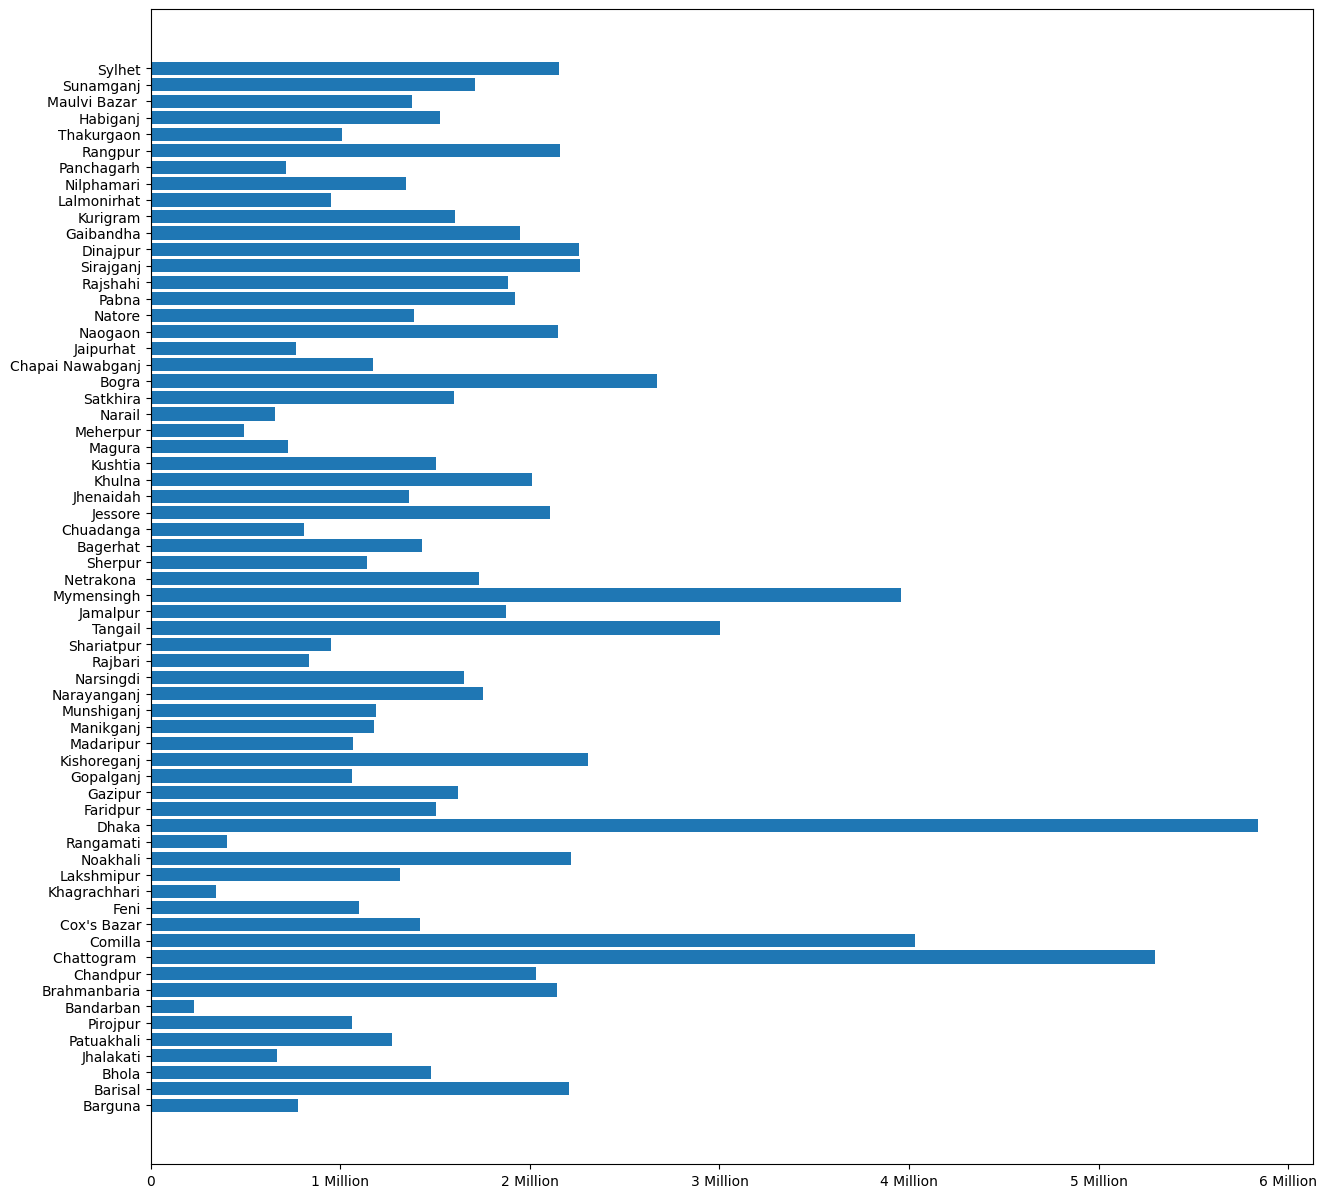

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
ax.barh(y=district_df['district'], width=district_df['census_1991'])
ax.set_xticklabels(['0', '1 Million', '2 Million','3 Million','4 Million','5 Million','6 Million'])
plt.show()

## In this part, we are animating to plot each district population over the varying decades.

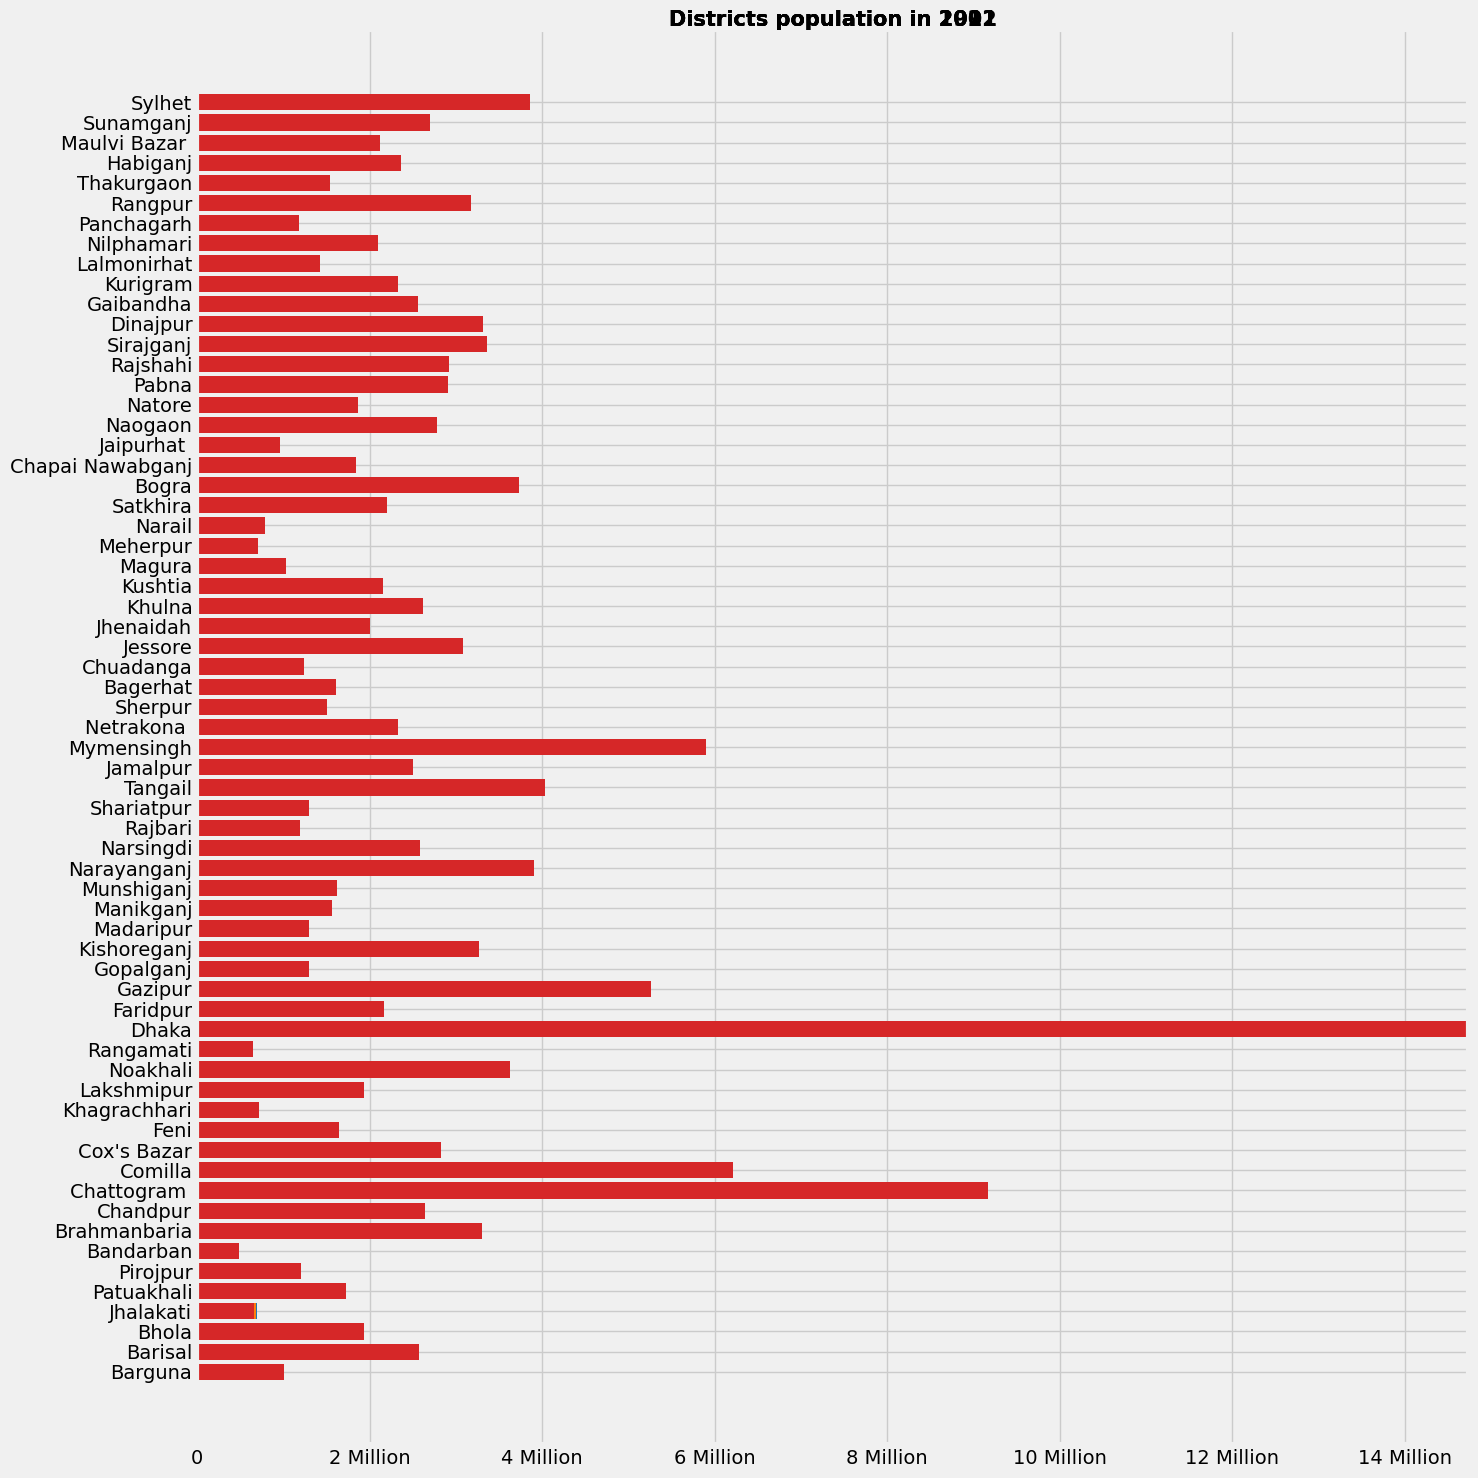

In [8]:
import matplotlib.animation as animation

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(15,15)

# Extract districts and census data
districts = district_df['district']
years = ['census_1991', 'census_2001', 'census_2011', 'census_2022']
census_values = [district_df[year].values for year in years]

# Set y positions (reverse for top-to-bottom)
y_pos = np.arange(len(districts))
ax.set_yticks(y_pos)
ax.set_yticklabels(districts)

# Fix x-axis limit if desired
ax.set_xlim(0, max([max(vals) for vals in census_values]) + 100)
ax.set_xticklabels(['0', '2 Million', '4 Million','6 Million','8 Million','10 Million','12 Million','14 Million'])

# Animation container
artists = []
colors = ['tab:green', 'tab:blue', 'tab:orange', 'tab:red']

for i, year_data in enumerate(census_values):
    bars = ax.barh(y_pos, year_data, color=colors[i])
    title = ax.text(0.5, 1, f'Districts population in {years[i][-4:]}',
                    transform=ax.transAxes, ha='center', va='bottom',
                    fontsize=15, weight='semibold')
    artists.append(list(bars)+ [title])

# Create the animation
ani = animation.ArtistAnimation(fig, artists, interval=2000, repeat_delay=1000)
plt.tight_layout()
plt.show()


In [9]:
ani.save("population_animation.gif")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date(year)         73 non-null     int64  
 1   population         73 non-null     int64  
 2   annual_pct_change  72 non-null     float64
 3   district           64 non-null     object 
 4   area(km²)          64 non-null     object 
 5   census_1991        64 non-null     object 
 6   census_2001        64 non-null     object 
 7   census_2011        64 non-null     object 
 8   census_2022        64 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.3+ KB


## Here, we are making a new dataset named `pop_df` from the original dataset.

In [11]:
pop_df = df[['date(year)','population','annual_pct_change']]
# pop_df.fillna(0,inplace=True)
pop_df.isna().sum()
pop_df.to_csv('total_pop_data.csv')

## twinx lineplot to see population changes over the years

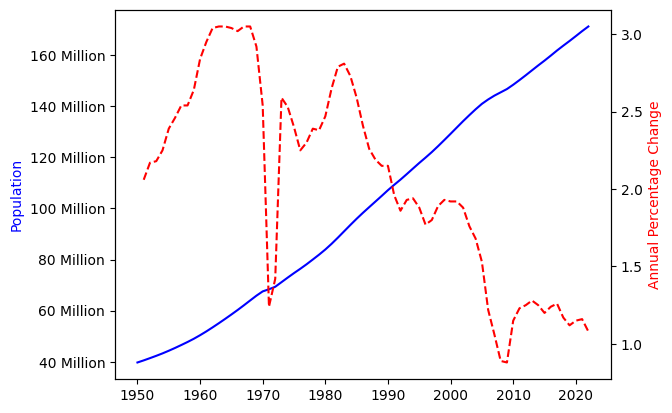

In [12]:
plt.style.use('default')

fig, ax = plt.subplots()

ax.plot('date(year)','population',data=pop_df,color='blue')
ax.set_ylabel('Population',color='b')
ax.set_yticks([40000000, 60000000, 80000000, 100000000, 120000000, 140000000, 160000000])
ax.set_yticklabels(['40 Million','60 Million','80 Million','100 Million','120 Million','140 Million','160 Million'])

ax2 = ax.twinx()

ax2.plot('date(year)','annual_pct_change',data=pop_df,color='red',linestyle='--')
ax2.set_ylabel('Annual Percentage Change',color='r')

plt.show()

## Taking the values of years, population and annual_pct_change because matplotlib animation requires the values

In [13]:
pop_df['annual_pct_change'].fillna(0,inplace=True)

years = pop_df['date(year)'].values
population = pop_df['population'].values
annual_pct_change = pop_df['annual_pct_change'].values

## Animating the twinx plot to depict overall population changes of **Bangladesh** over the years of 1950 to 2022

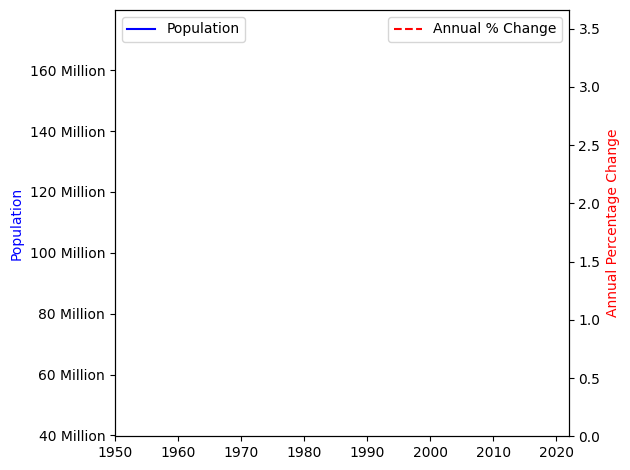

In [14]:
fig, ax = plt.subplots()


line1, = ax.plot([], [], 'b-', label="Population")
# ax.plot('date(year)','population',data=pop_df,color='blue')
ax.set_xlim(years.min(), years.max())
ax.set_ylim(population.min(), population.max() * 1.05)
ax.set_ylabel('Population',color='b')
ax.set_yticks([40000000, 60000000, 80000000, 100000000, 120000000, 140000000, 160000000])
ax.set_yticklabels(['40 Million','60 Million','80 Million','100 Million','120 Million','140 Million','160 Million'])
ax.legend(loc='upper left')

ax2 = ax.twinx()

line2, = ax2.plot([], [], 'r-', label="Annual % Change",linestyle='--')
# ax2.plot('date(year)','annual_pct_change',data=pop_df,color='red')
ax2.set_xlim(years.min(), years.max())
ax2.set_ylim(min(0, annual_pct_change.min()), annual_pct_change.max() * 1.2)
ax2.set_ylabel('Annual Percentage Change',color='r')
ax2.legend(loc='upper right')

def animate(i):
    line1.set_data(years[:i], population[:i])
    line2.set_data(years[:i], annual_pct_change[:i])

    return line1, line2

ani = animation.FuncAnimation(fig, animate, frames=len(years), interval=100, blit=True)
plt.tight_layout()

plt.show()

In [15]:
ani.save("overall_population_animation.gif")